<a href="https://colab.research.google.com/github/KarthikAnnavarapu/INNOVATE/blob/main/Innovate_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Install necessary libraries
!pip install opencv-python-headless
!pip install matplotlib
!pip install scikit-learn

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import skimage.color as color
from skimage.feature import hog  # Import the hog function

In [24]:
# Load image using urlopen
image_url = "https://www.queenscliffe.vic.gov.au/files/assets/public/images/your-council/news-thumbnails/gellibrand-street-crossing.jpg?w=1200"  # Replace with a valid URL
resp = urlopen(image_url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR) # Use imdecode to read image from URL
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

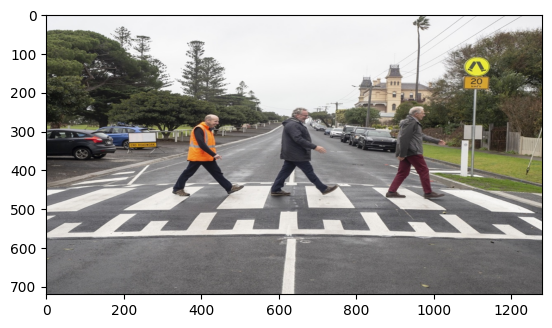

In [25]:
# Resize image
image_resized = cv2.resize(image, (1280, 720))
plt.imshow(image_resized)
plt.show()


In [26]:
# Convert to grayscale
gray_image = color.rgb2gray(image_resized)

# Extract HOG features
hog_features, hog_image = hog(gray_image, pixels_per_cell=(32, 32),
                              cells_per_block=(1, 1), visualize=True, feature_vector=True, block_norm='L1')

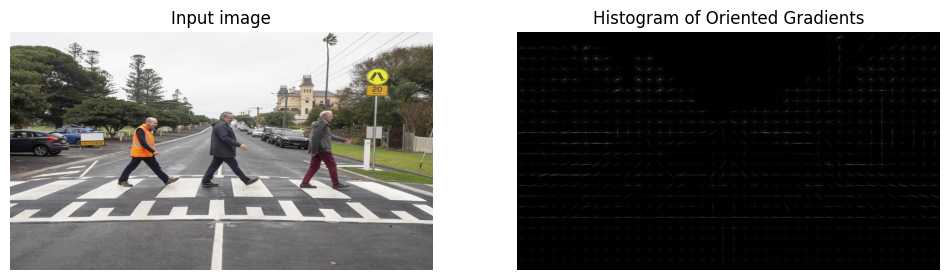

In [27]:
# Import the exposure module from skimage
from skimage import exposure

# Rescale the HOG image
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display HOG image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image_resized, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [28]:
# Load a sample dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target == 1  # Binary classification for demonstration

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LinearSVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best parameters found: {'C': 0.1}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [29]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Non-Pedestrian", "Pedestrian"]))

                precision    recall  f1-score   support

Non-Pedestrian       0.98      0.99      0.98       490
    Pedestrian       0.91      0.78      0.84        50

      accuracy                           0.97       540
     macro avg       0.94      0.89      0.91       540
  weighted avg       0.97      0.97      0.97       540



In [30]:
def detect_pedestrians(image, model):
    # Preprocess the image
    image_resized = cv2.resize(image, (8, 8)) # Resize to match the digits dataset
    # Convert to grayscale to match the digits dataset
    image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    # Reshape the image to a 1D array (like the digits dataset)
    image_flattened = image_gray.flatten()
    # Reshape to a 2D array for prediction (samples x features)
    image_reshaped = image_flattened.reshape(1, -1)

    # Predict using the model
    prediction = model.predict(image_reshaped) # Pass the reshaped image
    return prediction

# Test the detection function
sample_prediction = detect_pedestrians(image, grid_search.best_estimator_)
print("Pedestrian detected:", bool(sample_prediction))

Pedestrian detected: False


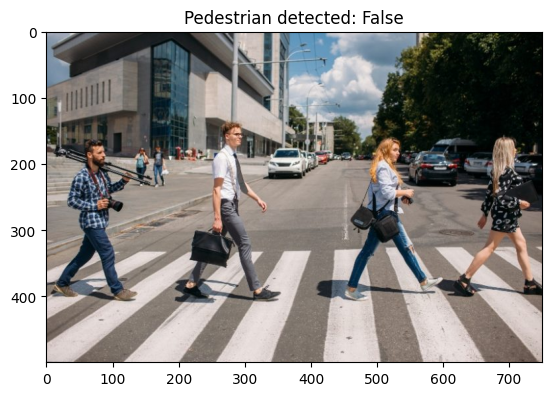

In [31]:
# Test on a new sample image
test_image_url = "https://callsam.com/wp-content/uploads/2019/12/crosswalk-featured-750x500.jpg"

# Try accessing the URL with a web browser to see if it loads correctly and if there are any visible access restrictions.

# If the image is accessible in a browser, try using a different library to download the image,
# such as 'requests' which often handles website restrictions better:
import requests
try:
    response = requests.get(test_image_url)
    response.raise_for_status()  # Raise an exception for bad status codes
    test_image = np.asarray(bytearray(response.content), dtype="uint8")
    test_image = cv2.imdecode(test_image, cv2.IMREAD_COLOR)
except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")

# If the issue persists, consider using a different image from a source that allows free access.
# For example, you can search for royalty-free images on websites like Unsplash or Pixabay.

# Detect pedestrians (if the image was successfully downloaded)
if 'test_image' in locals():
    test_prediction = detect_pedestrians(test_image, grid_search.best_estimator_)

    # Display the result
    plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Pedestrian detected: {bool(test_prediction)}')
    plt.show()